In [1]:
%matplotlib inline
import numpy as np
from image_reader import Image_reader
from caption_generator import Caption_generator
import matplotlib.pyplot as plt

#Instantiate image_reader with GoogleNet mean image
mean_image = np.array([104, 117, 123]).reshape((3,1,1))
image_reader=Image_reader(mean=mean_image)

#Instantiate caption generator
caption_model_place='../models/caption_model.chainer'
cnn_model_place='../data/bvlc_googlenet_caffe_chainer.pkl'
index2word_place='../work/index2token.pkl'
caption_generator=Caption_generator(caption_model_place=caption_model_place,cnn_model_place=cnn_model_place,index2word_place=index2word_place)

/Users/Satoshi/anaconda/lib/python2.7/site-packages/chainer/functions/activation/lstm.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + numpy.exp(-x))


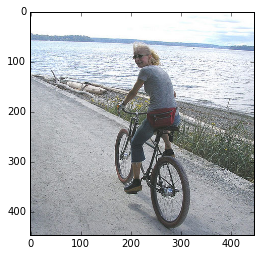

In [2]:
#The preparation is done
#Let's ganarate caption for a image

#How about this one?
image_file_path='../images/test_image.jpg'
im = plt.imread(image_file_path)
plt.imshow(im)

In [3]:
#First, read an image as numpy array
image_file_path='../images/test_image.jpg'
image=image_reader.read(image_file_path)
#Next, put the image into caption generator
#The output structure is 
#	[caption,caption,caption,...]
#	caption = {"sentence":This is a generated sentence, "probability": The probability of the generated sentence} 
captions=caption_generator.generate(image)

#For example, if you want to print all captions
for caption in captions:
    sentence=caption['sentence']
    probability=caption['probability']
    print " ".join(sentence),probability

the man is riding his bike on the beach 0.907442
the man is riding a bike on the beach 0.875081
the man is riding a bicycle on the beach 0.856281


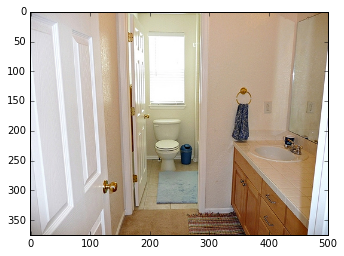

In [4]:
#Let's do for another image
image_file_path='../images/COCO_val2014_000000185546.jpg'
im = plt.imread(image_file_path)
plt.imshow(im)

In [5]:
image_file_path='../images/COCO_val2014_000000185546.jpg'
image=image_reader.read(image_file_path)
captions=caption_generator.generate(image)
for caption in captions:
    sentence=caption['sentence']
    probability=caption['probability']
    print " ".join(sentence),probability

the bathroom is clean and ready to use 0.90157
the bathroom is clean and ready to be used 0.967934
a bathroom with a toilet , sink , and mirror 0.920347
a bathroom with a toilet , sink , and shower 0.851494
